In [4]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import re
from Chemometrics.basic import psave,pload
%matplotlib inline

In [5]:
flist = glob.glob("./IR_oil/csv/*")

In [6]:
def merge_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist],axis=1)

In [7]:
df = merge_csv(flist,skiprows = 1,index_col=0)

In [8]:
ls = [fn[len('./IR_oil/csv\\'):-len('.csv'):] for fn in flist]

In [12]:
df.columns = ls

In [11]:
#去掉波数小于650的波段
df1 = df.loc[df.index >= 650,:]

In [13]:
#去掉nan，在摸索测试条件时有1个样本的分辨率太高导致其他地方很多nan
df1.columns[-df1.isnull().any()]
df2 = df1.loc[:,df.isnull().any()].dropna()

In [14]:
#去掉Administrator,air,Y-433-*,-cm结尾的
ls = df.columns.tolist()

In [15]:
#bool
cols = [not bool(re.match(r'^A|^a|^Y-433-|.*cm.*',li)) for li in ls]

In [16]:
df3 = df2.loc[:,cols]

In [32]:
#有很大的异常值
d = df3[df3<120].fillna(method='ffill')# 异常值用前一个替换[1,nan] --> [1,1]
#d.plot(legend=False)

In [13]:
#保存数据
#psave({u'raw':df,u'clean':d},'IR食用油.p')

In [30]:
plt.rcParams['figure.figsize'] = [20,10]

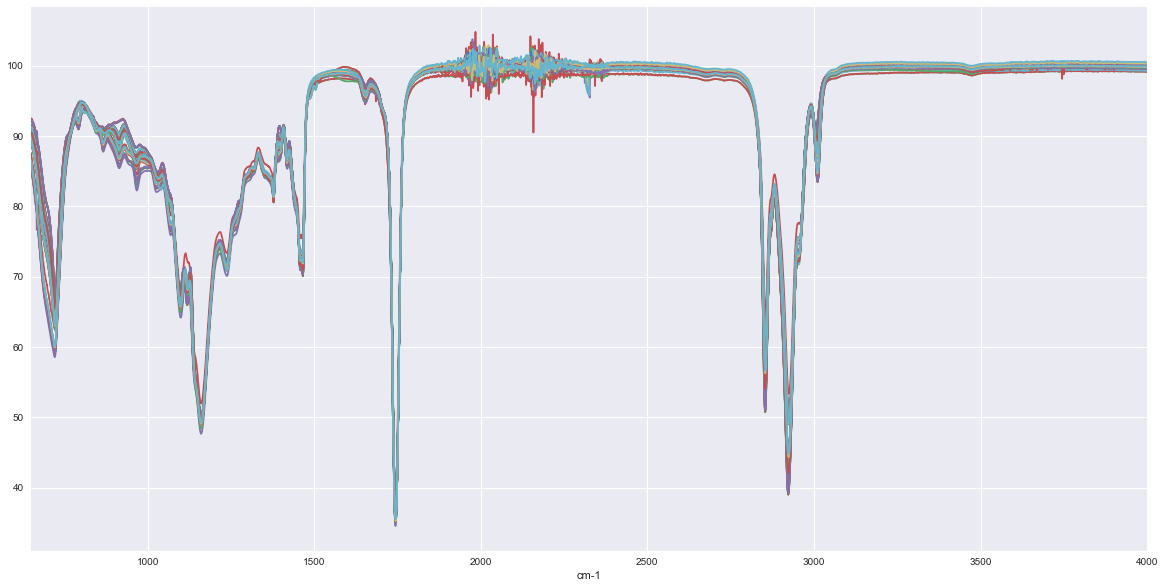

In [31]:
d.plot(legend=False)